In [1]:
import os
import numpy as np
from sklearn.metrics import accuracy_score
import cv2
from skimage import feature
import matplotlib.pyplot as plt

In [2]:
def loadData(input_folder):
    if not os.path.exists(input_folder):
        return []
    else:
        return os.listdir(input_folder)
input_folder = "./storage/test/"


In [3]:
def distance_euclidean(x, y):
    if len(x) != len(y):
        return None 
    squared_distance = 0
    for i in range(len(x)):
        squared_distance += (x[i] - y[i]) ** 2
    return squared_distance ** 0.5 

In [4]:

def knn(X_train, y_train, x_new, k):
    distances = []
    for i in range(len(X_train)):
        d = distance_euclidean(X_train[i], x_new)
        distances.append((d, y_train[i]))
    distances.sort()
    k_nearest = distances[:k]
    labels = {}
    for distance in k_nearest:
        label = distance[1]
        if label in labels:
            labels[label] += 1
        else:
            labels[label] = 1
    sorted_labels = sorted(labels.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels[0][0]

In [5]:
feature_path = "./feature/feature.npy"
feature_extrac = np.load(feature_path, allow_pickle="True")

X_HOG_HSV=[] ; y_HOG_HSV=[];
for i in feature_extrac:
    X_HOG_HSV.append(i[0])
    y_HOG_HSV.append(i[1])

In [6]:
y_HOG_HSV

['02c4ed9a-5c41-4c9f-aa08-a4333a5d0b3a.png',
 '0a50009f-7fdc-43e1-90d9-886f114dac45.png',
 '0d029717-507f-424c-9f18-b47a06b8e0f8.png',
 '10c725b4-c418-4aa7-a23f-c756b889aec9.png',
 '1a8ba103-0d7e-44b1-b973-24da9b8fa6e6.png',
 '1a9f6be5-2a59-4b2d-ab0f-d6b2635d34e0.png',
 '1bf88658-254b-4c12-86d7-1e1b83155e68.png',
 '1c85540c-fae3-49c2-bccf-f60d2a1678b2.png',
 '291d1dee-54f8-455d-bb0c-348e3a7343c9.png',
 '2bca563e-97c5-4e1e-933f-aae9c4903d89.png',
 '2f47312b-a951-4db2-b230-5107db4b744c.png',
 '31ab1cb1-7181-40c2-a67e-967ab867f34d.png',
 '336e8cf0-7539-461e-adea-7b0b9e9d690a.png',
 '34091bcd-38e4-474f-be08-43537eef0d02.png',
 '34a4292b-b9ec-4077-ad6e-6e9c18942352.png',
 '35d48695-7e3a-4caa-a88a-a636dc82c7a7.png',
 '393f844c-778b-49b3-ac2b-6f505b446fcf.png',
 '397e590e-609e-4b4b-adcb-8e5823b5976f.png',
 '3e191715-9b86-434a-a9d2-45c50f04bb99.png',
 '3e7159f8-747b-4d5e-8e48-465a768ad079.png',
 '446f81f4-66f6-4a6a-9a90-2ebde89d72ed.png',
 '4743dd64-99a9-4209-961d-565751ffcbfb.png',
 '48cbd90a

In [7]:


# y_HOG_HSV_pred=[]
# progress=0
# for i in X_HOG_HSV_test:
#   res= knn(X_HOG_HSV_train,y_HOG_HSV_train,i,7)
#   y_HOG_HSV_pred.append(res)
#   print(progress,end=" ")
#   progress+=1

# print()
# print(y_HOG_HSV_test)
# print(y_HOG_HSV_pred)
# accuracy = accuracy_score(y_HOG_HSV_test, y_HOG_HSV_pred)
# print(f"Accuracy: {accuracy:.2f}")

In [8]:
def convert_image_rgb_to_gray(sample):
  image = cv2.imread(os.path.join(input_folder, sample))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image

def process_fn(sample):
    image = cv2.imread(input_folder + sample)
    return image

In [9]:
def hog_feature(gray_img):
  hog_feat, hog_image = feature.hog(
        gray_img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2',
        visualize=True
    )
  return hog_feat

def get_vector_rbg(image, bins=32):
    red = cv2.calcHist(
        [image], [2], None, [bins], [0, 256]
    )
    green = cv2.calcHist(
        [image], [1], None, [bins], [0, 256]
    )
    blue = cv2.calcHist(
        [image], [0], None, [bins], [0, 256]
    )
    vector = np.concatenate([red, green, blue], axis=0)
    vector = vector.reshape(-1)
    return vector

In [10]:
def feature_extraction(image, gray_image):
  color_histogram = list(get_vector_rbg(image))
  hog = hog_feature(np.array(gray_image))
  hog = list(hog.flatten())
  return color_histogram + hog

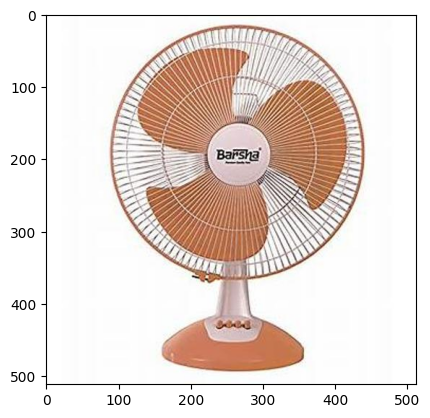

In [16]:
data = loadData(input_folder)
baseImage = process_fn(data[3])
grayImage = convert_image_rgb_to_gray(data[3])
image = feature_extraction(baseImage, grayImage)
res= knn(X_HOG_HSV,y_HOG_HSV,image,3)
plt.imshow(np.flip(baseImage,2))


76b33e61-2151-49ff-9b72-d29d17c63424.png


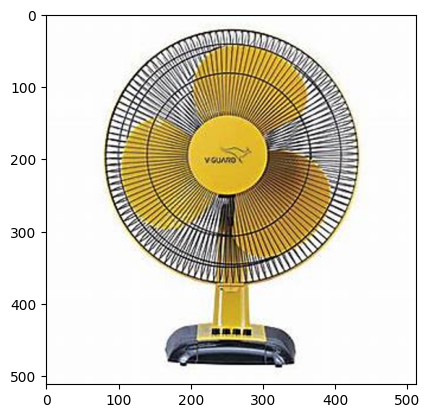

In [17]:
print(res)
plt.imshow(np.flip(cv2.imread("./storage/processed/"+ res),2))